---
title: Actor
jupyter: ir
---

In [1]:
# Load required libraries
library(ggplot2)
library(dplyr)
library(patchwork)
library(readxl)


Warning message:
"package 'ggplot2' was built under R version 4.4.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## Data

In [2]:
dataactor <- read_excel("data/ENG new - PELAKU USAHA MAKANAN rekap.xlsx")

In [3]:
#| echo: false
#| output: false
data.frame(colnames(dataactor))

colnames.dataactor.
<chr>
Timestamp
Name
Gender
Level of Education
Major/Background
Location/Address
City
Province
Types of Shop


## SocioDemographic

In [4]:
# Gender
table(dataactor$Gender)

# Create a standardized education category
library(tidyverse)
library(ggplot2)

dataactor$Edu <- factor(
  case_when(
    dataactor$`Level of Education` %in% c("Primary School", "Junior HS", "Senior HS") ~ "Basic Education",
    dataactor$`Level of Education` %in% c("Vocational School", "3y Diploma") ~ "Vocational",
    dataactor$`Level of Education` %in% c("Bachelor", "Bachelor Adm Negara", "Master Degre") ~ "College Degree",
    TRUE ~ "Other"
  ),
  levels = c("Basic Education", "Vocational", "College Degree"),
  ordered = TRUE
)
table(dataactor$Edu)

# Province
dataactor$Province <- recode(dataactor$Province,
                              "Dki Jakarta" = "Jakarta",
                              "DKI Jakarta" = "Jakarta",
                              "DIY" = "Central Java",
                              "Jawa Tengah" = "Central Java",
                              "Jawa Barat" = "West Java")
table(dataactor$Province)


Female   Male 
    26     24 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Basic Education      Vocational  College Degree 
             28              13               9 


Central Java      Jakarta    West Java 
          20           10           20 

In [5]:
#| echo: false
#| output: false

sum(is.na(dataactor$`Time of Employment (Year)`))

[1] 10

Idea:

Gender and Edu with pie
Province with SHP File (MAP)

Socio demographic data can use for calculating the weight of the data if number population is known.

## Ownership

In [6]:
#| echo: false
#| output: false

dataactor$`1. What is your status in this street vendor business?`
dataactor$`2. Is this business venture a joint venture or own capital?`
dataactor$`3. Does your business have a business license/legality?`
dataactor$`4. Does the product being sold have a distribution permit?`

[1] "Owner"    "Owner"    "Employee" "Owner"    "Owner"    "Owner"   
 [7] "Owner"    "Owner"    "Owner"    "Owner"    "Owner"    "Employee"
[13] "Employee" "Employee" "Employee" "Owner"    "Employee" "Owner"   
[19] "Employee" "Employee" "Employee" "Owner"    "Owner"    "Employee"
[25] "Employee" "Owner"    "Employee" "Employee" "Owner"    "Employee"
[31] "Employee" "Owner"    "Owner"    "Employee" "Owner"    "Owner"   
[37] "Owner"    "Owner"    "Owner"    "Owner"    "Owner"    "Owner"   
[43] "Owner"    "Employee" "Owner"    "Owner"    "Employee" "Employee"
[49] "Owner"    "Employee"

[1] "Own capital"    "Own capital"    "Joint ventures" "Own capital"   
 [5] "Own capital"    "Own capital"    "Own capital"    "Own capital"   
 [9] "Own capital"    "Own capital"    "Own capital"    "Own capital"   
[13] "Own capital"    "Own capital"    "Own capital"    "Own capital"   
[17] "Own capital"    "Own capital"    "Own capital"    "Own capital"   
[21] "Own capital"    "Own capital"    "Own capital"    "Own capital"   
[25] "Joint ventures" "Own capital"    "Own capital"    "Own capital"   
[29] "Joint ventures" "Own capital"    "Joint ventures" "Own capital"   
[33] "Own capital"    "Own capital"    "Own capital"    "Own capital"   
[37] "Own capital"    "Own capital"    "Own capital"    "Own capital"   
[41] "Own capital"    "Own capital"    "Own capital"    "Own capital"   
[45] "Own capital"    "Own capital"    "Joint ventures" "Joint ventures"
[49] "Own capital"    "Own capital"

[1] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[49] "Yes" "Yes"

[1] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "No" 
[25] "Yes" "No"  "No"  "Yes" "No"  "No"  "Yes" "Yes" "No"  "No"  "No"  "No" 
[37] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "No"  "No"  "Yes"
[49] "No"  "Yes"

Idea:

1 and 2 With Pie
3 and 4 with Bar but only show share of "Yes" 

In [ ]:
qown <- c("1. What is your status in this street vendor business?",
       "2. Is this business venture a joint venture or own capital?",
       "3. Does your business have a business license/legality?",
       "4. Does the product being sold have a distribution permit?")        

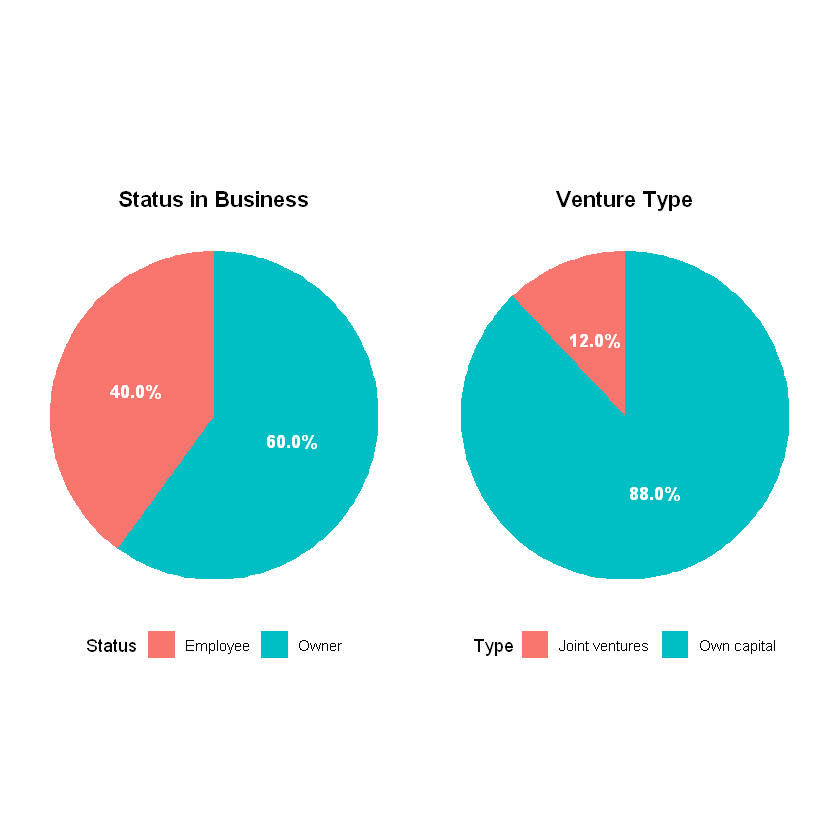

In [8]:
# Create enhanced pie charts with percentage labels
plot1 <- dataactor %>%
  count(`1. What is your status in this street vendor business?`) %>%
  mutate(percentage = n / sum(n) * 100,
         label = sprintf("%.1f%%", percentage)) %>%
  ggplot(aes(x = "", y = n, fill = `1. What is your status in this street vendor business?`)) +
  geom_bar(width = 1, stat = "identity") +
  geom_text(aes(label = label), 
            position = position_stack(vjust = 0.5), 
            color = "white", fontface = "bold") +
  coord_polar(theta = "y") +
  labs(title = "Status in Business", fill = "Status") +
  theme_void() +
  theme(legend.position = "bottom",
        plot.title = element_text(hjust = 0.5, face = "bold"))

plot2 <- dataactor %>%
  count(`2. Is this business venture a joint venture or own capital?`) %>%
  mutate(percentage = n / sum(n) * 100,
         label = sprintf("%.1f%%", percentage)) %>%
  ggplot(aes(x = "", y = n, fill = `2. Is this business venture a joint venture or own capital?`)) +
  geom_bar(width = 1, stat = "identity") +
  geom_text(aes(label = label), 
            position = position_stack(vjust = 0.5), 
            color = "white", fontface = "bold") +
  coord_polar(theta = "y") +
  labs(title = "Venture Type", fill = "Type") +
  theme_void() + 
  theme(legend.position = "bottom",
        plot.title = element_text(hjust = 0.5, face = "bold"))

# Combine plots side by side
plot1 + plot2 + plot_layout(ncol = 2)

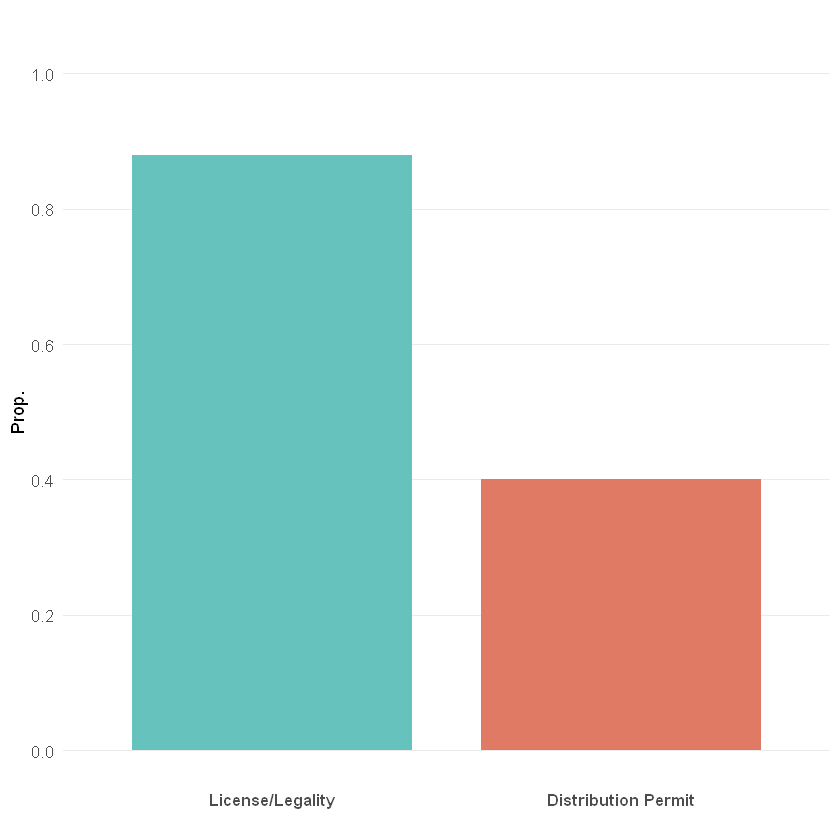

In [9]:
ownership_data <- data.frame(
  Category = c("License/Legality", "Distribution Permit"),
  Prop. = c(prop.table(table(dataactor[, qown[3]]))[2], prop.table(table(dataactor[, qown[4]]))[2])
)

# Create custom color palette that matches the image
my_colors <- c("#E07A64", "#66C2BD")

# Create the plot
ggplot(ownership_data, aes(x = reorder(Category, -Prop.), y = Prop., fill = Category)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), width = 0.8) +
  scale_fill_manual(values = my_colors) +
  labs(x = "", y = "Prop.", title = "") +
  theme_minimal() +
  theme(
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text.y = element_text(size = 10),
    axis.text.x = element_text(size = 10, face = "bold"),
    legend.position = "none",
    legend.title = element_blank()
  ) +
  scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, 0.2), 
                    labels = function(x) sprintf("%.1f", x))

## Leadership

In [10]:
#| echo: false
#| output: false

dataactor$`5. Is there anyone in charge of this business operation?`
dataactor$`6. Is anyone responsible for the quality and safety of the food sold/produced?`
dataactor$`7. Is anyone responsible as suppliers for raw materials?`
dataactor$`8. Are there quality guidelines and procedures related to food safety in the business?`
dataactor$`9. Are there any provisions regarding raw materials and products that are not suitable for use or sale?`

[1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

[1] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

[1] "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes"
[13] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

[1] "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

[1] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

In [11]:
qlead <- c("5. Is there anyone in charge of this business operation?",
       "6. Is anyone responsible for the quality and safety of the food sold/produced?",
       "7. Is anyone responsible as suppliers for raw materials?",
       "8. Are there quality guidelines and procedures related to food safety in the business?",
       "9. Are there any provisions regarding raw materials and products that are not suitable for use or sale?")
       

Idea:

All in one bar chart with share of "Yes" for each question

We can use weighted estimates if we have population data for each province, for example.
weight = prop_population / prop_sample

~ if prop sample < prop population, then weight > 1

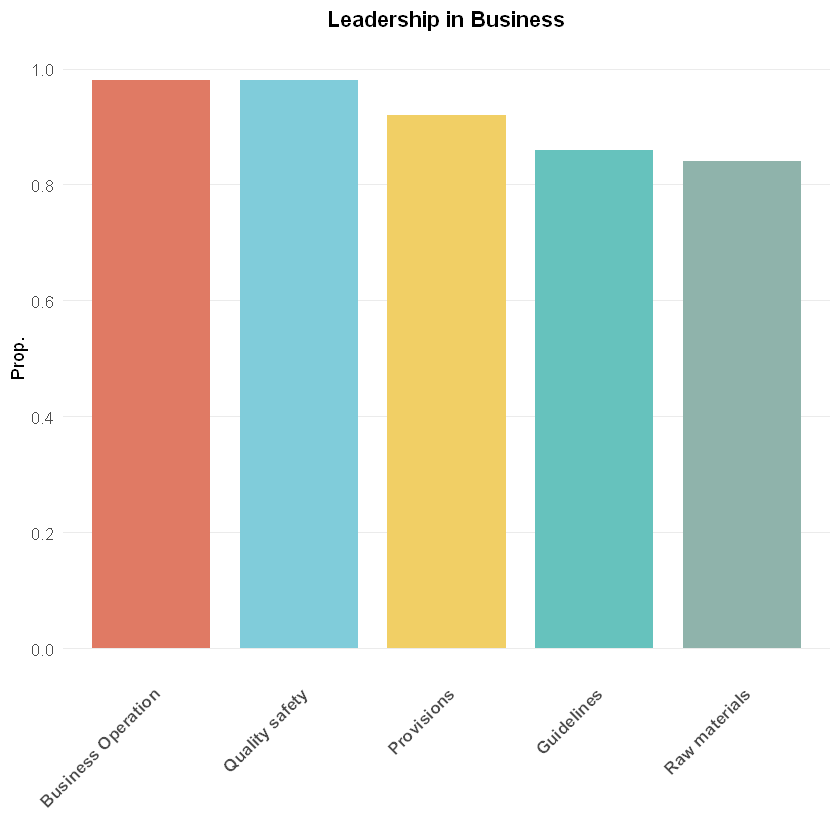

In [12]:
# Create data frame for leadership questions
# Extract "Yes" proportions for each leadership question
leadership_data <- data.frame(
  Question = c("Business Operation", 
               "Quality safety", 
               "Raw materials", 
               "Guidelines", 
               "Provisions"),
  Prop. = c(
    prop.table(table(dataactor[, qlead[1]]))[which(names(table(dataactor[, qlead[1]])) == "Yes")],
    prop.table(table(dataactor[, qlead[2]]))[which(names(table(dataactor[, qlead[2]])) == "Yes")],
    prop.table(table(dataactor[, qlead[3]]))[which(names(table(dataactor[, qlead[3]])) == "Yes")],
    prop.table(table(dataactor[, qlead[4]]))[which(names(table(dataactor[, qlead[4]])) == "Yes")],
    prop.table(table(dataactor[, qlead[5]]))[which(names(table(dataactor[, qlead[5]])) == "Yes")]
  )
)

# Create a color palette for 5 categories
lead_colors <- c("#E07A64", "#66C2BD", "#F1CF65", "#80CCDA", "#8FB3AB")

# Create the plot
ggplot(leadership_data, aes(x = reorder(Question, -Prop.), y = Prop., fill = Question)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), width = 0.8) +
  scale_fill_manual(values = lead_colors) +
  labs(x = "", y = "Prop.", title = "Leadership in Business") +
  theme_minimal() +
  theme(
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text.y = element_text(size = 10),
    axis.text.x = element_text(size = 10, face = "bold", angle = 45, hjust = 1),
    legend.position = "none",
    plot.title = element_text(hjust = 0.5, face = "bold")
  ) +
  scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, 0.2), 
                    labels = function(x) sprintf("%.1f", x))

## Planning

In [13]:
dataactor$`10. While working with food, do you pay attention to matters related to the cleanliness of the food (food safety) that is sold or produced?`
dataactor$`11. Does your business follow up the customer feedback for improvement?`
dataactor$`12. Does your business conduct annual or periodic evaluations?`

[1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

[1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "No"  "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "No" 
[25] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No" 
[37] "No"  "No"  "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

[1] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "No"  "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "No"  "Yes" "Yes" "Yes" "No"  "No"  "Yes" "No"  "No"  "Yes" "Yes"
[49] "Yes" "Yes"

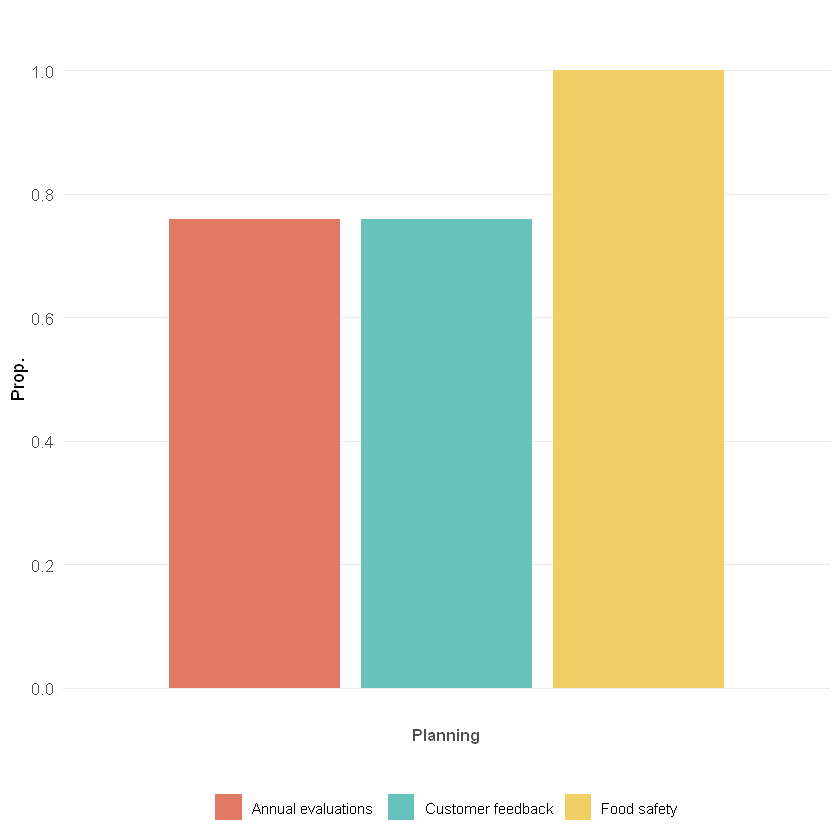

In [27]:
# Define the planning questions
qplan <- c("10. While working with food, do you pay attention to matters related to the cleanliness of the food (food safety) that is sold or produced?",
           "11. Does your business follow up the customer feedback for improvement?",
           "12. Does your business conduct annual or periodic evaluations?")

# Create planning data frame with "Yes" proportions
planning_data <- data.frame(
  Category = c("Food safety", "Customer feedback", "Annual evaluations"),
  Prop. = c(
    prop.table(table(dataactor[, qplan[1]]))[which(names(table(dataactor[, qplan[1]])) == "Yes")],
    prop.table(table(dataactor[, qplan[2]]))[which(names(table(dataactor[, qplan[2]])) == "Yes")],
    prop.table(table(dataactor[, qplan[3]]))[which(names(table(dataactor[, qplan[3]])) == "Yes")]
  )
)

# Create custom color palette with three colors
plan_colors <- c("#E07A64", "#66C2BD", "#F1CF65")

# Create the plot
ggplot(planning_data, aes(x = "Planning", y = Prop., fill = Category)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), width = 0.8) +
  scale_fill_manual(values = plan_colors) +
  labs(x = "", y = "Prop.", title = "") +
  theme_minimal() +
  theme(
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text.y = element_text(size = 10),
    axis.text.x = element_text(size = 10, face = "bold"),
    legend.position = "bottom",
    legend.title = element_blank()
  ) +
  scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, 0.2), 
                    labels = function(x) sprintf("%.1f", x))

## Human resources

In [41]:
# Find column position for question 13 and 23
which(colnames(dataactor) == "13. Is this business run by workers with relevant experience or skills?")
which(colnames(dataactor) == "23. Is there any prohibition for workers who process food to wear jewelry, watches, brooches and others?")   

c(dataactor[,25])
c(dataactor[,26])
c(dataactor[,27])
c(dataactor[,28])
c(dataactor[,29])
c(dataactor[,30])
c(dataactor[,31])
c(dataactor[,32])
c(dataactor[,33])
c(dataactor[,34])   
c(dataactor[,35])
c(dataactor[,36])

[1] 25

[1] 36

$`13. Is this business run by workers with relevant experience or skills?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[49] "Yes" "Yes"

$`14. What types of attributes do food processing workers use while working? (Choose the answers that suit you the best (you may choose more than one)`
 [1] "head cover, Mask, Gloves, Apron/apron"        
 [2] "Glove"                                        
 [3] "head cover, Mask, Gloves, Apron/apron"        
 [4] "head cover, Mask, Gloves, Apron/apron"        
 [5] "Apron/apron"                                  
 [6] "head cover, Mask, Gloves, Apron/apron, Others"
 [7] "head cover, Mask, Gloves, Apron/apron, Others"
 [8] "Gloves, Apron/Apron"                          
 [9] "Masks, Gloves, Aprons/aprons"                 
[10] "Masks, Gloves, More"                          
[11] "Masks, Gloves"                                
[12] "head cover, Gloves, Apron/apron"              
[13] "Other"                                        
[14] "Glove"                                        
[15] "Masks, Gloves"                                
[16] "head cover, Apron/apron"                      
[17] "Glove"                                        
[18] "Apron/apron"                                  
[19] "Apron/apron"                                  
[20] "Apron/apron"                                  
[21] "head cover, Gloves, Apron/apron"              
[22] "Gloves, Apron/Apron"                          
[23] "head cover, Mask, Gloves, Apron/apron"        
[24] "Gloves, Apron/Apron"                          
[25] "Apron/apron"                                  
[26] "Gloves, Apron/Apron"                          
[27] "head cover, Mask, Gloves"                     
[28] "Apron/apron"                                  
[29] "Apron/apron"                                  
[30] "head cover, Gloves"                           
[31] "Head cover"                                   
[32] "head cover, Gloves, Apron/apron"              
[33] "Apron/apron"                                  
[34] "head cover, Mask, Apron/apron"                
[35] "Mask, Apron/Apron"                            
[36] "head cover, Apron/apron"                      
[37] "Gloves, Apron/Apron"                          
[38] "Gloves, Apron/Apron"                          
[39] "Glove"                                        
[40] "Glove"                                        
[41] "Other"                                        
[42] "Head cover"                                   
[43] "Other"                                        
[44] "head cover, Gloves"                           
[45] "Other"                                        
[46] "Other"                                        
[47] "Glove"                                        
[48] "Glove"                                        
[49] "Other"                                        
[50] "head cover, Apron/apron"

$`If the answer to the previous question (Question 14) is "Other", please specify`
 [1] NA                                                           
 [2] NA                                                           
 [3] NA                                                           
 [4] NA                                                           
 [5] NA                                                           
 [6] "Shoe"                                                       
 [7] "Shoe"                                                       
 [8] NA                                                           
 [9] NA                                                           
[10] "None"                                                       
[11] "None"                                                       
[12] NA                                                           
[13] "Organized by the Floating Market Manager"                   
[14] NA                                                           
[15] NA                                                           
[16] "Don't wash your gloves because you have to wash your hands."
[17] NA                                                           
[18] NA                                                           
[19] NA                                                           
[20] NA                                                           
[21] NA                                                           
[22] NA                                                           
[23] NA                                                           
[24] NA                                                           
[25] NA                                                           
[26] NA                                                           
[27] NA                                                           
[28] NA                                                           
[29] NA                                                           
[30] NA                                                           
[31] NA                                                           
[32] NA                                                           
[33] NA                                                           
[34] "Mask when unhealthy"                                        
[35] NA                                                           
[36] NA                                                           
[37] NA                                                           
[38] NA                                                           
[39] NA                                                           
[40] NA                                                           
[41] "Does not require the use of the above"                      
[42] NA                                                           
[43] NA                                                           
[44] NA                                                           
[45] "Hat"                                                        
[46] "Always wash your hands"                                     
[47] NA                                                           
[48] NA                                                           
[49] "Does not require the use of the above"                      
[50] NA

$`15. Are workers allowed to smoke/vape during food preparation or handling?`
 [1] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No" 
[13] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "No"  "No"  "No" 
[25] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No" 
[37] "Yes" "No"  "No"  "No"  "Yes" "No"  "No"  "No"  "Yes" "No"  "No"  "No" 
[49] "No"  "No"

$`16. Do workers who handle food wash their hands before working?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`17.  Do workers change clothes before work or wear special working attire?`
 [1] "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "No"  "Yes"
[13] "No"  "No"  "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No" 
[25] "Yes" "Yes" "No"  "Yes" "No"  "Yes" "No"  "No"  "No"  "Yes" "No"  "No" 
[37] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes" "No" 
[49] "No"  "Yes"

$`18. Do workers who work must be in good health?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`19. Are there any provisions for periodic health checks for workers?`
 [1] "Yes" "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "No" 
[13] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "No"  "No"  "No" 
[25] "Yes" "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "No"  "No"  "No"  "No" 
[37] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes"
[49] "No"  "No"

$`20. Does this business have employees who work specifically as cashiers?`
 [1] "No"  "No"  "Yes" "No"  "Yes" "Yes" "Yes" "No"  "No"  "No"  "No"  "Yes"
[13] "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[25] "No"  "No"  "Yes" "Yes" "No"  "No"  "Yes" "No"  "No"  "No"  "No"  "No" 
[37] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "No" 
[49] "No"  "Yes"

$`21. Is the cashier allowed to do food processing?`
 [1] "No"  "Yes" "No"  "Yes" "No"  "No"  "No"  "Yes" "Yes" "Yes" "No"  "No" 
[13] "No"  "Yes" "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "No"  "No" 
[25] "No"  "Yes" "No"  "Yes" "Yes" "Yes" "No"  "No"  "Yes" "No"  "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "No"  "Yes" "Yes"
[49] "Yes" "No"

$`22. Do workers have knowledge about food storage temperatures (meat, fish, vegetables and other ingredients)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No" 
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`23. Is there any prohibition for workers who process food to wear jewelry, watches, brooches and others?`
 [1] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "No"  "No" 
[13] "No"  "No"  "Yes" "No"  "No"  "No"  "Yes" "Yes" "No"  "No"  "Yes" "No" 
[25] "No"  "Yes" "No"  "Yes" "Yes" "No"  "No"  "Yes" "No"  "No"  "No"  "No" 
[37] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes"
[49] "No"  "Yes"

## Infrastructure and facilities

In [43]:
# find column position for question 50
which(colnames(dataactor) == "50. Are production tool/equipment/facilities regularly maintained?")

c(dataactor[, 37])
c(dataactor[, 38])
c(dataactor[, 39])
c(dataactor[, 40])
c(dataactor[, 41])
c(dataactor[, 42])
c(dataactor[, 43])
c(dataactor[, 44])
c(dataactor[, 45])
c(dataactor[, 46])
c(dataactor[, 47])
c(dataactor[, 48])
c(dataactor[, 49])
c(dataactor[, 50])
c(dataactor[, 51])
c(dataactor[, 52])
c(dataactor[, 53])
c(dataactor[, 54])
c(dataactor[, 55])
c(dataactor[, 56])
c(dataactor[, 57])
c(dataactor[, 58])
c(dataactor[, 59])
c(dataactor[, 60])
c(dataactor[, 61])
c(dataactor[, 62])
c(dataactor[, 63])
c(dataactor[, 64])
c(dataactor[, 65])


[1] 65

$`24. Does the business provide a place to wash hands?`
 [1] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`25. Does the business site provide handwash soap ?`
 [1] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`26. Are the floors and walls of the food processing area in good condition (clean, undamaged, easy to wash and disinfect)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`27. Is the tabletop for processing food in good condition (clean, undamaged, smooth surface, easy to wash and disinfect)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`28. Have you ever seen food pests (rats, insects) at your business location?`
 [1] "Yes" "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "No" 
[13] "No"  "Yes" "Yes" "Yes" "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "No" 
[25] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "No"  "Yes" "No"  "No"  "No"  "No"  "Yes" "Yes" "No"  "Yes"
[49] "No"  "Yes"

$`29. Have you ever seen personal items (cell phones, bags) of workers in food processing areas?`
 [1] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "No" 
[13] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes" "No" 
[25] "No"  "No"  "No"  "Yes" "No"  "Yes" "Yes" "No"  "Yes" "No"  "No"  "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "No"

$`30. Are raw materials stored in good conditions (e.g., clean, covered, suitable temperatures)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`31. Is the food processing equipment in clean and good condition (determined visually)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`32. Are ready-to-eat products and trash bins placed separately?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No" 
[13] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No" 
[37] "No"  "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`33. Is there a supervisor in the production/food processing area?`
 [1] "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "No"  "No"  "No"  "Yes" "Yes"
[13] NA    "No"  "No"  "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "No"  "Yes"

$`34. Are workers with injured hands not allowed to work?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "No"  "Yes" "Yes"
[13] "No"  "No"  "Yes" "No"  "Yes" "No"  "Yes" "Yes" "No"  "Yes" "No"  "Yes"
[25] "No"  "Yes" "No"  "No"  "Yes" "Yes" "No"  "No"  "No"  "No"  "Yes" "No" 
[37] "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes"
[49] "No"  "Yes"

$`35. Should workers with long hair protect their hair to reduce the risk of food contamination?`
 [1] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "No"  "Yes" "No"  "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[37] "No"  "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[49] "No"  "Yes"

$`36. Do workers wash their hands frequently and properly (based on observation)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" NA    "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`37. Do workers wear and change disposable gloves?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "No"  "No"  "No"  "No" 
[37] "No"  "No"  "Yes" "Yes" "No"  "No"  "No"  "Yes" "No"  "No"  "Yes" "Yes"
[49] "No"  "Yes"

$`38. Are workers prohibited from touching their face, hair, nose, or ears during food processing?`
 [1] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "Yes" "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes" "No"  "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes"
[49] "Yes" "Yes"

$`39. Are closed display cases (containers) used to protect food from dust or pests?`
 [1] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`40. Does this business use different kitchen utensils (knives, cutting boards, etc.) for different types of food?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[25] "Yes" "Yes" "No"  "Yes" "No"  "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`41. Are there waste bins at the production site and at the service site?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`42. What is the waste collection schedule?`
 [1] "Other"     "Every day" "Every day" "Every day" "Every day" "Every day"
 [7] "Every day" "Other"     "Every day" "Every day" "Every day" "Every day"
[13] "Every day" "Every day" "Every day" "Other"     "Every day" "Every day"
[19] "Every day" "Every day" "Every day" "Other"     "Every day" "Every day"
[25] "Every day" "Every day" "Every day" "Every day" "Every day" "Every day"
[31] "Every day" "Every day" "Every day" "Every day" "Every day" "Every day"
[37] "Every day" "Every day" "Every day" "Every day" "Every day" "Every day"
[43] "Every day" "Every day" "Every day" "Every day" "Every day" "Every day"
[49] "Every day" "Every day"

$`If the answer to the previous question (Question 42) is "Other", please specify`
 [1] "Twice a week"                                                                                 
 [2] NA                                                                                             
 [3] NA                                                                                             
 [4] NA                                                                                             
 [5] NA                                                                                             
 [6] NA                                                                                             
 [7] NA                                                                                             
 [8] "3 x Week"                                                                                     
 [9] NA                                                                                             
[10] NA                                                                                             
[11] "None"                                                                                         
[12] "garbage is disposed of at the shelter, transported by garbage truck after the shelter is full"
[13] "a day can be several times"                                                                   
[14] NA                                                                                             
[15] NA                                                                                             
[16] "2-3 times a week"                                                                             
[17] NA                                                                                             
[18] NA                                                                                             
[19] NA                                                                                             
[20] NA                                                                                             
[21] NA                                                                                             
[22] "Once every 2 or 3 days"                                                                       
[23] NA                                                                                             
[24] "2 times a day"                                                                                
[25] NA                                                                                             
[26] NA                                                                                             
[27] NA                                                                                             
[28] NA                                                                                             
[29] NA                                                                                             
[30] NA                                                                                             
[31] NA                                                                                             
[32] NA                                                                                             
[33] NA                                                                                             
[34] NA                                                                                             
[35] NA                                                                                             
[36] NA                                                                                             
[37] NA                                                                                             
[38] NA                                                                                             
[39] NA                                                                        

$`43. Does this business have a refrigerator/freezer to store raw materials such as meat or fish?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "No"  "Yes" "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`44. Does this business use disposable tableware?`
 [1] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No" 
[13] "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "No"  "No"  "No"  "No"  "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "No"  "No"  "Yes" "No"  "No" 
[37] "Yes" "No"  "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "No" 
[49] "Yes" "No"

$`45. How is the process of washing cutlery?`
 [1] "Using running water"     "Using running water"    
 [3] "Using running water"     "Using running water"    
 [5] "Using running water"     "Using running water"    
 [7] "Using running water"     "Using running water"    
 [9] "Using running water"     "Using running water"    
[11] "Using running water"     "Using running water"    
[13] "Other"                   "Using running water"    
[15] "Other"                   "Using water in a bucket"
[17] "Using running water"     "Other"                  
[19] "Using running water"     "Using running water"    
[21] "Using running water"     "Using running water"    
[23] "Using running water"     "Using running water"    
[25] "Using running water"     "Using running water"    
[27] "Using running water"     "Using running water"    
[29] "Using running water"     "Using running water"    
[31] "Using running water"     "Using running water"    
[33] "Using running water"     "Using running water"    
[35] "Using running water"     "Using running water"    
[37] "Using running water"     "Using running water"    
[39] "Using water in a bucket" "Using running water"    
[41] "Using water in a bucket" "Other"                  
[43] "Using running water"     "Only wiped"             
[45] "Using water in a bucket" "Using running water"    
[47] "Using running water"     "Using running water"    
[49] "Using running water"     "Using running water"

$`If the answer to the previous question (Question 45) is "Other", please specify`
 [1] NA                                                       
 [2] NA                                                       
 [3] NA                                                       
 [4] NA                                                       
 [5] NA                                                       
 [6] NA                                                       
 [7] NA                                                       
 [8] NA                                                       
 [9] NA                                                       
[10] NA                                                       
[11] NA                                                       
[12] NA                                                       
[13] "disposable tools"                                       
[14] NA                                                       
[15] "disposable cutlery, cookware flushed with running water"
[16] NA                                                       
[17] NA                                                       
[18] "Washed in another part, the food court section"         
[19] NA                                                       
[20] NA                                                       
[21] NA                                                       
[22] NA                                                       
[23] NA                                                       
[24] NA                                                       
[25] NA                                                       
[26] NA                                                       
[27] NA                                                       
[28] NA                                                       
[29] NA                                                       
[30] NA                                                       
[31] NA                                                       
[32] NA                                                       
[33] NA                                                       
[34] NA                                                       
[35] NA                                                       
[36] NA                                                       
[37] NA                                                       
[38] NA                                                       
[39] NA                                                       
[40] NA                                                       
[41] NA                                                       
[42] NA                                                       
[43] NA                                                       
[44] NA                                                       
[45] NA                                                       
[46] NA                                                       
[47] NA                                                       
[48] NA                                                       
[49] NA                                                       
[50] NA

$`46. Is the layout of production equipment arranged to prevent cross contamination?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`47. Are the sources of clean water for the production process sufficient and meet the requirements for clean water quality?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`48. Are cleaning tools such as brooms, brushes, mops, rags and/or dusters, detergents, buckets in clean condition?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`49. Are there any drainage channels for dirty water and waste available?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`50. Are production tool/equipment/facilities regularly maintained?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

## Work environment 


In [51]:
which(colnames(dataactor) == "56. Are the buildings and production facilities free from pollution?")

c(dataactor[, 66])
c(dataactor[, 67])
c(dataactor[, 68])
c(dataactor[, 69])
c(dataactor[, 70])
c(dataactor[, 71])

[1] 71

$`51. Does the company pay attention to social factors at work (relations between workers, non-discrimination)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`52. Does the company pay attention to the psychological factors of workers at work (stress, emotions)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes"
[49] "Yes" "Yes"

$`53. Does the company pay attention to the comfort of physical factors at work (temperature, heat, humidity, air flow, noise)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" NA    "Yes" "Yes"
[49] "Yes" "Yes"

$`54. Is the business location kept clean, free from trash, odors, smoke, dirt and dust?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`55. Is the surrounding environment maintained in a clean condition (garbage is not piled up and covered, roads are not dusty and gutters function properly)?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[25] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`56. Are the buildings and production facilities free from pollution?`
 [1] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[25] "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "No"  "Yes" "No"  "Yes"
[37] "No"  "Yes" "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

## Product and quality control

In [54]:
which(colnames(dataactor) == "69. How to handle partially damaged/poor quality food ingredients?  (You may choose more than one)")

c(dataactor[, 72])
c(dataactor[, 73])
c(dataactor[, 74])
c(dataactor[, 75])
c(dataactor[, 76])
c(dataactor[, 77])
c(dataactor[, 78])
c(dataactor[, 79])
c(dataactor[, 80])
c(dataactor[, 81])
c(dataactor[, 82])
c(dataactor[, 83])
c(dataactor[, 84])
c(dataactor[, 85])
c(dataactor[, 86])
c(dataactor[, 87])
c(dataactor[, 88])
c(dataactor[, 89])
c(dataactor[, 90])

[1] 90

$`57. What type of food does your shop or business sell? Choose the answers that suit you the best (you may choose more than one)`
 [1] "Fast food"             "Ready-to-eat meals"    "Fast food, Fast food" 
 [4] "Ready-to-eat meals"    "Ready-to-eat meals"    "Ready-to-eat meals"   
 [7] "Ready-to-eat meals"    "Ready-to-eat meals"    "Other"                
[10] "Ready-to-eat meals"    "Ready-to-eat meals"    "Other"                
[13] "Fast food, Fast food"  "Ready-to-eat meals"    "Ready meals, Others"  
[16] "Fresh food"            "Fast food"             "Ready-to-eat meals"   
[19] "Fast food"             "Fast food"             "Ready-to-eat meals"   
[22] "Fast food"             "Fast food"             "Ready-to-eat meals"   
[25] "Fast food"             "Fast food"             "Fast food"            
[28] "Ready-to-eat meals"    "Fresh food"            "Fast food"            
[31] "Fast food"             "Fast food, Others"     "Fast food"            
[34] "Fast food"             "Fast food"             "Fast food"            
[37] "Fresh food"            "Fast food"             "Fast food"            
[40] "Fresh food"            "Fast food, Fast food"  "Fresh food"           
[43] "Fast food, Fresh food" "Fast food"             "Fast food"            
[46] "Fast food"             "Fast food"             "Fast food"            
[49] "Fast food"             "Fast food"

$`If the answer to the previous question (Question 57) is "Other", please specify`
 [1] NA                                                             
 [2] NA                                                             
 [3] NA                                                             
 [4] NA                                                             
 [5] NA                                                             
 [6] NA                                                             
 [7] NA                                                             
 [8] NA                                                             
 [9] "Processing raw food to be cooked like hygienic home food"     
[10] "Dry food"                                                     
[11] "Dry food"                                                     
[12] "restaurant"                                                   
[13] NA                                                             
[14] NA                                                             
[15] "kebab"                                                        
[16] NA                                                             
[17] NA                                                             
[18] NA                                                             
[19] NA                                                             
[20] NA                                                             
[21] NA                                                             
[22] NA                                                             
[23] NA                                                             
[24] NA                                                             
[25] NA                                                             
[26] NA                                                             
[27] NA                                                             
[28] NA                                                             
[29] NA                                                             
[30] NA                                                             
[31] NA                                                             
[32] "Fast food in frozen and ready-to-eat form in retort packaging"
[33] NA                                                             
[34] NA                                                             
[35] NA                                                             
[36] NA                                                             
[37] NA                                                             
[38] NA                                                             
[39] NA                                                             
[40] NA                                                             
[41] NA                                                             
[42] NA                                                             
[43] NA                                                             
[44] NA                                                             
[45] NA                                                             
[46] NA                                                             
[47] NA                                                             
[48] NA                                                             
[49] NA                                                             
[50] NA

$`58. Do the products include food that needs to be reheated before being sold?`
 [1] "Yes" "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No" 
[13] "No"  "No"  "Yes" "No"  "No"  "No"  "Yes" "Yes" "Yes" "Yes" "No"  "No" 
[25] "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "No"  "No"  "Yes" "No"  "Yes" "No"  "Yes" "No"  "Yes" "No"  "Yes" "No" 
[49] "Yes" "No"

$`59. How to handle products that are not sold out on one day? (You may choose more than one)`
 [1] "Stored for resale" "Stored for resale" "Discarded"        
 [4] "Stored for resale" "Discarded"         "Other"            
 [7] "Discarded"         "Stored for resale" "Other"            
[10] "Discarded"         "Discarded"         "Discarded"        
[13] "Other"             "Discarded"         "Other"            
[16] "Discarded"         "Stored for resale" "Other"            
[19] "Stored for resale" "Stored for resale" "Discarded"        
[22] "Stored for resale" "Other"             "Stored for resale"
[25] "Discarded"         "Stored for resale" "Stored for resale"
[28] "Discarded"         "Other"             "Stored for resale"
[31] "Discarded"         "Other"             "Stored for resale"
[34] "Stored for resale" "Stored for resale" "Stored for resale"
[37] "Other"             "Discarded"         "Discarded"        
[40] "Discarded"         "Other"             "Stored for resale"
[43] "Discarded"         "Discarded"         "Other"            
[46] "Stored for resale" "Other"             "Discarded"        
[49] "Discarded"         "Other"

$`If the answer to the previous question (Question 59) is "Other", please specify`
 [1] NA                                                                                                        
 [2] NA                                                                                                        
 [3] NA                                                                                                        
 [4] NA                                                                                                        
 [5] NA                                                                                                        
 [6] "Give it to neighbour"                                                                                    
 [7] NA                                                                                                        
 [8] NA                                                                                                        
 [9] "Eaten for the family or given to those in need"                                                          
[10] "None"                                                                                                    
[11] "None"                                                                                                    
[12] NA                                                                                                        
[13] "shared with peers"                                                                                       
[14] NA                                                                                                        
[15] "meat is stored, vegetables are discarded"                                                                
[16] NA                                                                                                        
[17] NA                                                                                                        
[18] "By order, there is no leftovers"                                                                         
[19] "Shawn is still in the process of being replaced."                                                        
[20] NA                                                                                                        
[21] NA                                                                                                        
[22] NA                                                                                                        
[23] "So far, orders are on demand, so they must run out. If the banana ingredients are stored in the frezeerr"
[24] NA                                                                                                        
[25] NA                                                                                                        
[26] "Sold for other types of menus (fried rice ingredients)"                                                  
[27] NA                                                                                                        
[28] NA                                                                                                        
[29] "Products that are not suitable for sale are thrown away."                                                
[30] NA                                                                                                        
[31] NA                                                                                                        
[32] "Is given to employees and eaten by themselves"                                                           
[33] NA                                                                                                        
[34] NA                                                                                                        
[35] NA                                                                                                      

$`60. Do you separate raw ingredients and cooked food?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`61. Are food ingredients washed before processing?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`62. What water source does your business use?`
 [1] "Well water"          "Well water"          "Refillable water"   
 [4] "Water companies"     "Refillable water"    "Refillable water"   
 [7] "Refillable water"    "Water companies"     "Water companies"    
[10] "Refillable water"    "Refillable water"    "Other"              
[13] "Well water"          "Water companies"     "Mobile water vendor"
[16] "Well water"          "Other"               "Water companies"    
[19] "Water companies"     "Refillable water"    "Water companies"    
[22] "Water companies"     "Other"               "Water companies"    
[25] "Water companies"     "Water companies"     "Water companies"    
[28] "Well water"          "Well water"          "Water companies"    
[31] "Well water"          "Water companies"     "Water companies"    
[34] "Water companies"     "Water companies"     "Water companies"    
[37] "Water companies"     "Water companies"     "Refillable water"   
[40] "Water companies"     "Water companies"     "Refillable water"   
[43] "Well water"          "Water companies"     "Water companies"    
[46] "Water companies"     "Refillable water"    "Water companies"    
[49] "Other"               "Refillable water"

$Column1
 [1] "Well water"          "Well water"          "Refillable water"   
 [4] "Water companies"     "Refillable water"    "Refillable water"   
 [7] "Refillable water"    "Water companies"     "Water companies"    
[10] "Refillable water"    "Refillable water"    "Other"              
[13] "Well water"          "Water companies"     "Mobile water vendor"
[16] "Well water"          "Other"               "Water companies"    
[19] "Water companies"     "Refillable water"    "Water companies"    
[22] "Water companies"     "Other"               "Water companies"    
[25] "Water companies"     "Water companies"     "Water companies"    
[28] "Well water"          "Well water"          "Water companies"    
[31] "Well water"          "Water companies"     "Water companies"    
[34] "Water companies"     "Water companies"     "Water companies"    
[37] "Water companies"     "Water companies"     "Refillable water"   
[40] "Water companies"     "Water companies"     "Refillable water"   
[43] "Well water"          "Water companies"     "Water companies"    
[46] "Water companies"     "Refillable water"    "Water companies"    
[49] "Other"               "Refillable water"

$`If the answer to the previous question (Question 62) is "Other", please specify`
 [1] NA                                                       
 [2] NA                                                       
 [3] NA                                                       
 [4] NA                                                       
 [5] NA                                                       
 [6] NA                                                       
 [7] NA                                                       
 [8] NA                                                       
 [9] NA                                                       
[10] "Bottled water"                                          
[11] "Bottled water"                                          
[12] "TAPS"                                                   
[13] "Source of water"                                        
[14] NA                                                       
[15] "gallon of water"                                        
[16] NA                                                       
[17] NA                                                       
[18] NA                                                       
[19] NA                                                       
[20] NA                                                       
[21] NA                                                       
[22] NA                                                       
[23] "Provided at the tap managed by the Floating Market Area"
[24] NA                                                       
[25] NA                                                       
[26] NA                                                       
[27] NA                                                       
[28] NA                                                       
[29] NA                                                       
[30] NA                                                       
[31] NA                                                       
[32] NA                                                       
[33] NA                                                       
[34] NA                                                       
[35] NA                                                       
[36] NA                                                       
[37] NA                                                       
[38] NA                                                       
[39] NA                                                       
[40] NA                                                       
[41] NA                                                       
[42] "Gallons"                                                
[43] NA                                                       
[44] NA                                                       
[45] NA                                                       
[46] NA                                                       
[47] NA                                                       
[48] NA                                                       
[49] "Artesis drill water"                                    
[50] NA

$`63. Do you use refillable gallon water as a source of drinking water?`
 [1] "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "No" 
[13] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "No"  "No"  "Yes" "Yes" "No" 
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`64. Do you boil water?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" NA    "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`65. How is customer food waste handled?`
 [1] "Taken by the other party"          "Taken by the other party"         
 [3] "Discarded"                         "Taken by the other party"         
 [5] "Discarded"                         "Discarded"                        
 [7] "Discarded"                         "Discarded"                        
 [9] "Discarded, Other"                  "Other"                            
[11] "Discarded"                         "Discarded"                        
[13] "Taken by the other party"          "Discarded"                        
[15] "Discarded, Taken by another party" "Discarded"                        
[17] "Discarded"                         "Taken by the other party"         
[19] "Discarded"                         "Taken by the other party"         
[21] "Taken by the other party"          "Discarded"                        
[23] "Taken by the other party"          "Discarded"                        
[25] "Discarded"                         "Discarded"                        
[27] "Discarded"                         "Discarded"                        
[29] "Discarded"                         "Discarded"                        
[31] "Discarded"                         "Discarded, Taken by another party"
[33] "Taken by the other party"          "Discarded"                        
[35] "Discarded"                         "Discarded"                        
[37] "Discarded"                         "Discarded"                        
[39] "Discarded"                         "Discarded"                        
[41] "Discarded"                         NA                                 
[43] "Discarded"                         "Discarded"                        
[45] "Discarded"                         "Discarded"                        
[47] "Discarded"                         "Discarded"                        
[49] "Discarded"                         "Discarded"

$`If the answer to the previous question (Question 65) is "Other", please specify`
 [1] NA                                                   
 [2] NA                                                   
 [3] NA                                                   
 [4] NA                                                   
 [5] NA                                                   
 [6] NA                                                   
 [7] NA                                                   
 [8] NA                                                   
 [9] "Can be taken by people who keep ducks for duck food"
[10] "None"                                               
[11] "None"                                               
[12] NA                                                   
[13] "Managed area"                                       
[14] NA                                                   
[15] NA                                                   
[16] NA                                                   
[17] NA                                                   
[18] NA                                                   
[19] NA                                                   
[20] NA                                                   
[21] "handled by Manager"                                 
[22] NA                                                   
[23] NA                                                   
[24] NA                                                   
[25] NA                                                   
[26] NA                                                   
[27] NA                                                   
[28] NA                                                   
[29] NA                                                   
[30] NA                                                   
[31] NA                                                   
[32] NA                                                   
[33] NA                                                   
[34] NA                                                   
[35] NA                                                   
[36] NA                                                   
[37] NA                                                   
[38] NA                                                   
[39] NA                                                   
[40] NA                                                   
[41] NA                                                   
[42] NA                                                   
[43] NA                                                   
[44] NA                                                   
[45] NA                                                   
[46] NA                                                   
[47] NA                                                   
[48] NA                                                   
[49] NA                                                   
[50] NA

$`66. If the raw food materials from the supplier are not of good quality, will your business change the supplier?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "No"  "No" 
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No" 
[37] NA    "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[49] "Yes" "Yes"

$`67. Are the stored food ingredients packaged in small portions according to sales portions?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "No"  "Yes" "No"  "Yes" "No"  "No"  "Yes" "No"  "No" 
[25] "Yes" "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "No"  "Yes" "No"  "No" 
[37] "No"  "No"  "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes"
[49] "Yes" "Yes"

$`68. How to handle expired food? (You may choose more than one)`
 [1] "Processed into other food products"  
 [2] "Discarded"                           
 [3] "Discarded"                           
 [4] "Discarded"                           
 [5] "Discarded"                           
 [6] "Discarded"                           
 [7] "Discarded"                           
 [8] "Discarded"                           
 [9] "Discarded"                           
[10] "Discarded"                           
[11] "Discarded"                           
[12] "Discarded"                           
[13] "Discarded, Other"                    
[14] "Discarded"                           
[15] "Discarded"                           
[16] "Discarded"                           
[17] "Discarded"                           
[18] "Used & cooked again as usual, Others"
[19] "Discarded"                           
[20] "Discarded"                           
[21] "Discarded, Other"                    
[22] "Discarded"                           
[23] "Other"                               
[24] "Discarded"                           
[25] "Discarded"                           
[26] "Other"                               
[27] "Discarded"                           
[28] "Discarded"                           
[29] "Discarded"                           
[30] "Discarded"                           
[31] "Discarded"                           
[32] "Discarded"                           
[33] "Discarded"                           
[34] "Discarded, Other"                    
[35] "Discarded"                           
[36] "Discarded"                           
[37] "Discarded"                           
[38] "Discarded"                           
[39] "Discarded"                           
[40] "Discarded"                           
[41] "Discarded"                           
[42] "Discarded"                           
[43] "Discarded"                           
[44] "Discarded"                           
[45] "Discarded"                           
[46] "Discarded"                           
[47] "Discarded"                           
[48] "Discarded"                           
[49] "Discarded"                           
[50] "Discarded"

$`If the answer to the previous question (Question 68) is "Other", please specify`
 [1] NA                                                  
 [2] NA                                                  
 [3] NA                                                  
 [4] NA                                                  
 [5] NA                                                  
 [6] NA                                                  
 [7] NA                                                  
 [8] NA                                                  
 [9] NA                                                  
[10] "None"                                              
[11] "None"                                              
[12] NA                                                  
[13] "Protest to Suplier"                                
[14] NA                                                  
[15] NA                                                  
[16] NA                                                  
[17] NA                                                  
[18] "No residue for meat, the broth is reheated"        
[19] NA                                                  
[20] NA                                                  
[21] "returned to center"                                
[22] NA                                                  
[23] "According to the condition of the consumer (order)"
[24] NA                                                  
[25] NA                                                  
[26] "Never, cooked new everytime"                       
[27] NA                                                  
[28] NA                                                  
[29] NA                                                  
[30] NA                                                  
[31] NA                                                  
[32] NA                                                  
[33] NA                                                  
[34] "No expiration always runs out"                     
[35] NA                                                  
[36] NA                                                  
[37] NA                                                  
[38] NA                                                  
[39] NA                                                  
[40] NA                                                  
[41] NA                                                  
[42] NA                                                  
[43] NA                                                  
[44] NA                                                  
[45] NA                                                  
[46] NA                                                  
[47] NA                                                  
[48] NA                                                  
[49] NA                                                  
[50] NA

$`69. How to handle partially damaged/poor quality food ingredients?  (You may choose more than one)`
 [1] "Take advantage of what is still good"
 [2] "Take advantage of what is still good"
 [3] "Take advantage of what is still good"
 [4] "Discarded"                           
 [5] "Discarded"                           
 [6] "Discarded"                           
 [7] "Discarded"                           
 [8] "Discarded"                           
 [9] "Take advantage of what is still good"
[10] "Take advantage of what is still good"
[11] "Take advantage of what is still good"
[12] "Discarded"                           
[13] "Discarded"                           
[14] "Discarded"                           
[15] "Discarded"                           
[16] "Discarded"                           
[17] "Discarded"                           
[18] "Discarded"                           
[19] "Take advantage of what is still good"
[20] "Discarded"                           
[21] "Discarded"                           
[22] "Discarded"                           
[23] "Discarded"                           
[24] "Discarded"                           
[25] "Discarded"                           
[26] "Other"                               
[27] "Discarded"                           
[28] "Discarded"                           
[29] "Take advantage of what is still good"
[30] "Discarded"                           
[31] "Discarded"                           
[32] "Other"                               
[33] "Discarded"                           
[34] "Discarded"                           
[35] "Take advantage of what is still good"
[36] "Take advantage of what is still good"
[37] "Take advantage of what is still good"
[38] "Discarded"                           
[39] "Take advantage of what is still good"
[40] "Discarded"                           
[41] "Other"                               
[42] "Discarded"                           
[43] "Discarded"                           
[44] "Discarded"                           
[45] "Discarded"                           
[46] "Discarded"                           
[47] "Take advantage of what is still good"
[48] "Discarded"                           
[49] "Discarded"                           
[50] "Other"

## Employees competence

In [55]:
dataactor$`70. Is there anyone at your business who understands food safety?`
dataactor$`71. Have any employees undergone food safety or clean and healthy food preparation training?`
dataactor$`72. Do employees have basic knowledge on food safety principles?`

[1] "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

[1] "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes"
[13] "No"  "No"  "No"  "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "No"  "Yes" "No" 
[25] "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes"
[37] "Yes" "Yes" "No"  "Yes" "No"  "No"  "Yes" "No"  "Yes" "No"  "Yes" "Yes"
[49] "Yes" "Yes"

[1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[13] "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

## Documented information

In [56]:
dataactor$`73. Are there records and documentation regarding the expiration date of raw materials, incoming orders, pest control, cleaning schedules for facilities and business premises?`
dataactor$`74. Are there any records regarding worker health checks, training schedules, worker leave schedules?`


[1] "No"  "No"  "Yes" "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes"
[13] "No"  "No"  "Yes" "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "No"  "Yes"
[25] "Yes" "Yes" "No"  "No"  "No"  "Yes" "No"  "Yes" "No"  "No"  "No"  "Yes"
[37] "No"  "Yes" "No"  "Yes" "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes"
[49] "No"  "Yes"

[1] "No"  "No"  "Yes" "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes"
[13] "Yes" "No"  "No"  "No"  "No"  "Yes" "No"  "No"  "No"  "Yes" "No"  "No" 
[25] "Yes" "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes" "No"  "No"  "No"  "No" 
[37] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "Yes"
[49] "No"  "Yes"

## Operational

In [60]:
which(colnames(dataactor) == "75. Are the materials used in the production process (i.e. raw materials, auxiliary materials, food additive) and final products stored in good conditions to avoid a decrease in quality?")

c(dataactor[, 97])
c(dataactor[, 98])
c(dataactor[, 99])
c(dataactor[, 100])
c(dataactor[, 101])
c(dataactor[, 102])
c(dataactor[, 103])

[1] 97

$`75. Are the materials used in the production process (i.e. raw materials, auxiliary materials, food additive) and final products stored in good conditions to avoid a decrease in quality?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`76. Is the storage of materials and final products marked with dates and use the First In First Out system?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "No" 
[25] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No" 
[37] "No"  "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`77. Have ingredients that easily absorb water been stored in a dry place ? (example: salt, sugar and powdered spices)`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`78. Are hazardous materials such as cleaning soap, sanitation materials, insecticides, rat bait, etc. are stored in a separate room and monitored so as not to contaminate the foods?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No" 
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "No"  "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`79. Are machines/equipment that have been cleaned but not yet used stored in a clean place and in good condition, with the surface of the equipment facing down or covered, to protect it from dust, dirt or other contamination?`
 [1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

$`80. Is food packaging clearly and informatively labeled to make it easier for consumers to select, handle, store, process and consume food?`
 [1] "Yes" "No"  "Yes" "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes"
[13] "Yes" "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "Yes" "No" 
[25] "Yes" "No"  "No"  "No"  "No"  "Yes" "No"  "Yes" "No"  "No"  "No"  "No" 
[37] "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "Yes" "No"  "No"  "Yes"
[49] "No"  "Yes"

$`81. Is there a person in charge who oversees all stages of the production process and controls it to ensure that good quality and safe food products are produced?`
 [1] "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

## Customer

In [62]:
dataactor$`82. Does your shop have regular customers?`
dataactor$`83. Do you ask for feedback/suggestions from customers regarding the food you sell?`
dataactor$`84. Have you ever received complaints from customers regarding the food you sell?`

[1] "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[25] "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[37] "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

[1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"
[13] "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "No" 
[25] "Yes" "Yes" "Yes" "No"  "Yes" "No"  "Yes" "Yes" "No"  "Yes" "Yes" "No" 
[37] "No"  "Yes" "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"

[1] "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "No"  "Yes" "Yes" "Yes"
[13] "No"  "Yes" "No"  "No"  "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes" "No" 
[25] "Yes" "Yes" "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes" "Yes" "No"  "No" 
[37] "No"  "No"  "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "Yes"
[49] "Yes" "Yes"